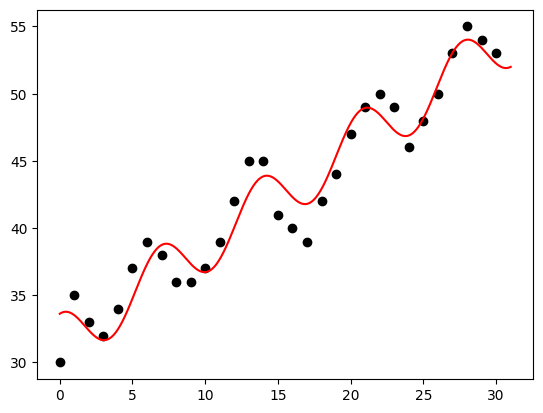

In [1]:
import numpy as np 
import scipy.optimize as opt
import matplotlib.pyplot as plt


#data
X = np.arange(0,31)
Y = np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

#define the model function
# c corresponds to the parameters, x is the x's and y is f(x) or output

def model(c,x,y): 
    #this is just the error: least squared error - diff between model & true value
    e2 = np.sqrt(np.sum((c[0]*np.cos(c[1]*x)+ (c[2]*x) + c[3] -y)**2)/32)
    return e2

v0 = np.array([3, 1*np.pi/4, 2/3, 32])   # 3 pi/4 2/3 32

#trying to minimize the error:  hence using minimize
res= opt.minimize(model, v0, args=(X, Y), method='Nelder-Mead')

#gets optimized parameters: values of parameters that will produce 
# the least amount of error 
c = res.x
error = res.fun

In [2]:
A = c[0]
B = c[1]
C = c[2]
D = c[3]

print(A,B,C,D)

print("Minimum error:", res.fun)


2.1716818723637914 0.9093249029166655 0.7324784894461773 31.45291849616531
Minimum error: 1.5676419884974475


(ii) With the results of (i), fix two of the parameters and sweep through values of the other two parameters to generate a 2D loss (error) landscape. Do all combinations of two fixed parameters and two swept parameters. You can use something like pcolor to visualize the results in a grid. How many minima can you find as you sweep through parameters?

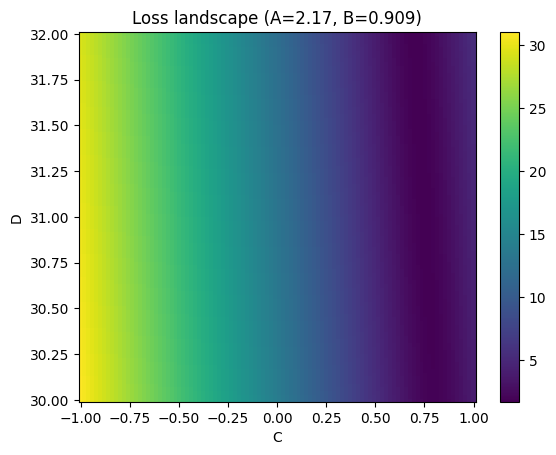

In [18]:
# Generate a grid of values for C and D to sweep on 
C_vals = np.linspace(-1, 1, 100)
D_vals = np.linspace(30,32, 100)
C_grid, D_grid = np.meshgrid(C_vals, D_vals)

# Fix A and B to the values found in part (i)
A = c[0]
B = c[1]

# Compute the LSE for each combination of C and D
LSE_grid = np.zeros((100, 100))
for i in range(100):
    for j in range(100):
        C = C_vals[i]
        D = D_vals[j]
        c = [A,B,C_grid[i,j],D_grid[i,j]]
        LSE_grid[i,j] = model(c,X,Y)

# Plot the results
plt.pcolor(C_grid, D_grid, LSE_grid)
plt.xlabel('C')
plt.ylabel('D')
plt.title('Loss landscape (A=2.17, B=0.909)')
plt.colorbar()

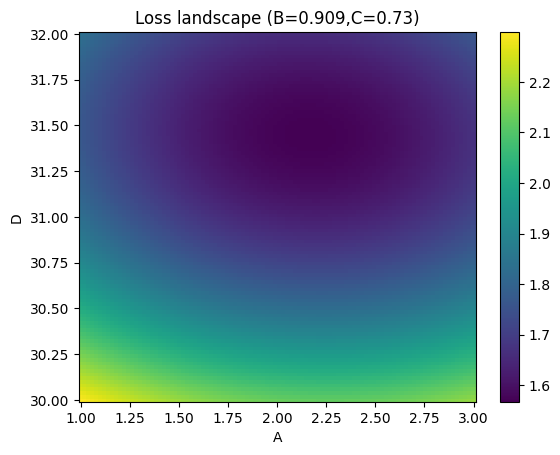

In [4]:
# Generate a grid of values for A and D to sweep on 
A_vals = np.linspace(1, 3, 100)
D_vals = np.linspace(30, 32, 100)
A_grid, D_grid = np.meshgrid(A_vals, D_vals)

# Fix A and B to the values found in part (i)
C = 0.7324784894461773 #c[2]
B = 0.9093249029166655 #c[1]

# Compute the LSE for each combination of C and D
LSE_grid = np.zeros((100, 100))
for i in range(100):
    for j in range(100):
        A = A_vals[i]
        D = D_vals[j]
        c = [A_grid[i,j],B,C,D_grid[i,j]]
        LSE_grid[i,j] = model(c,X,Y)

# Plot the results
plt.pcolor(A_grid, D_grid, LSE_grid)
plt.xlabel('A')
plt.ylabel('D')
plt.title('Loss landscape (B=0.909,C=0.73)')
plt.colorbar()

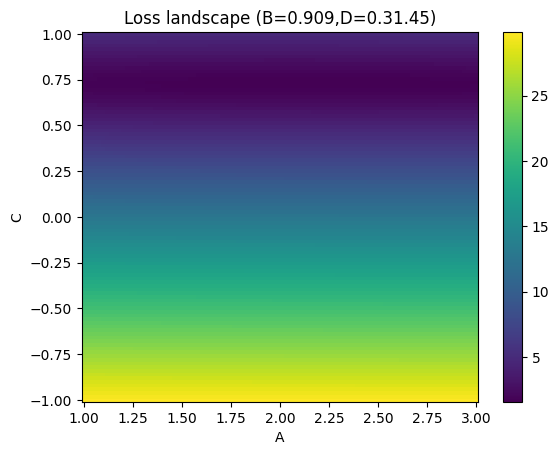

In [17]:
# Generate a grid of values for A and C to sweep on 
A_vals = np.linspace(1, 3, 100)
C_vals = np.linspace(-1, 1, 100)
A_grid, C_grid = np.meshgrid(A_vals, C_vals)

# Fix A and B to the values found in part (i)
D = 31.45291849616531#c[3]
B = 0.9093249029166655 #c[1]

# Compute the LSE for each combination of C and D
LSE_grid = np.zeros((100, 100))
for i in range(100):
    for j in range(100):
        A = A_vals[i]
        C = C_vals[j]
        c = [A_grid[i,j],B,C_grid[i,j],D]
        LSE_grid[i,j] = model(c,X,Y)

# Plot the results
plt.pcolor(A_grid, C_grid, LSE_grid)
plt.xlabel('A')
plt.ylabel('C')
plt.title('Loss landscape (B=0.909,D=0.31.45)')
plt.colorbar()

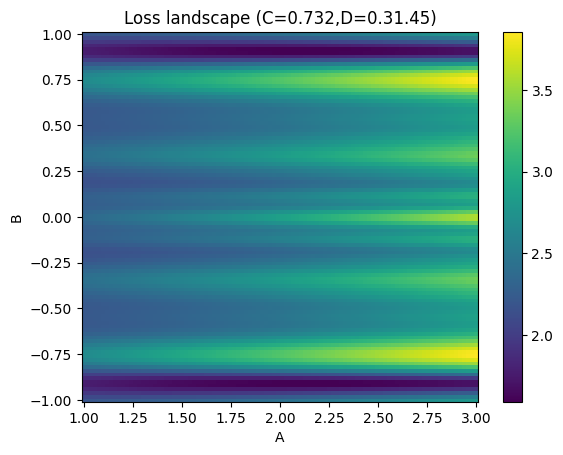

In [12]:
# sweep on A & B 

# Generate a grid of values for A and C to sweep on 
A_vals = np.linspace(1, 3, 100)
B_vals = np.linspace(-1, 1, 100)
A_grid, B_grid = np.meshgrid(A_vals, B_vals)

# Fix D and C to the values found in part (i)
D = 31.45291849616531#c[3]
C = 0.7324784894461773 #c[2]

# Compute the LSE for each combination of C and D
LSE_grid = np.zeros((100, 100))
for i in range(100):
    for j in range(100):
        A = A_vals[i]
        B = B_vals[j]
        c = [A_grid[i,j],B_grid[i,j],C,D]
        LSE_grid[i,j] = model(c,X,Y)

# Plot the results
plt.pcolor(A_grid, B_grid, LSE_grid)
plt.xlabel('A')
plt.ylabel('B')
plt.title('Loss landscape (C=0.732,D=0.31.45)')
plt.colorbar()

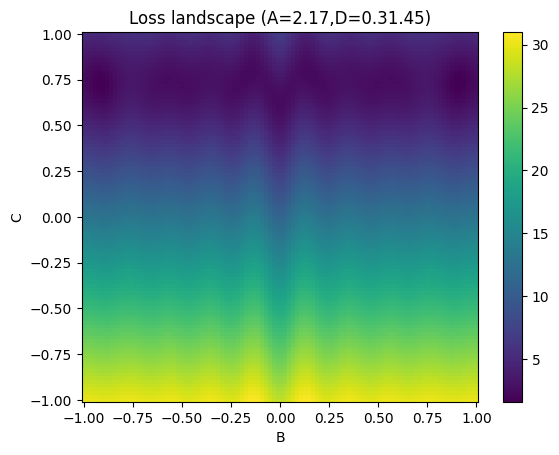

In [16]:
# sweep on B & C

# Generate a grid of values for B and C to sweep on 
C_vals = np.linspace(-1, 1, 100)
B_vals = np.linspace(-1, 1, 100)
B_grid, C_grid = np.meshgrid(B_vals, C_vals)

# Fix A and D to the values found in part (i)
D = 31.45291849616531 #c[3]
A = 2.1716818723637914 #c[2]

# Compute the LSE for each combination of C and D
LSE_grid = np.zeros((100, 100))
for i in range(100):
    for j in range(100):
        B = B_vals[i]
        C = C_vals[j]
        c = [A,B_grid[i,j],C_grid[i,j],D]
        LSE_grid[i,j] = model(c,X,Y)

# Plot the results
plt.pcolor(B_grid, C_grid, LSE_grid)
plt.xlabel('B')
plt.ylabel('C')
plt.title('Loss landscape (A=2.17,D=0.31.45)')
plt.colorbar()

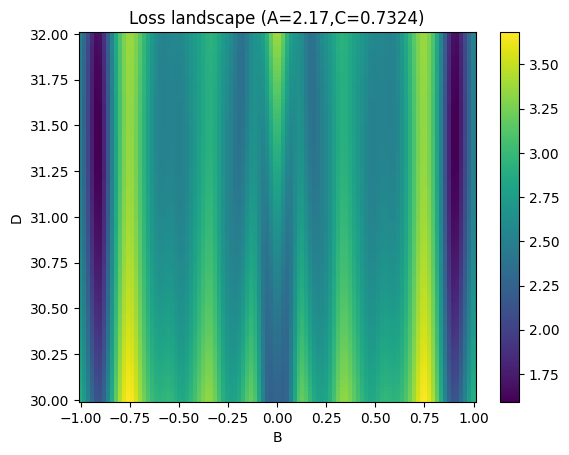

In [19]:
# sweep on B & D 

# Generate a grid of values for B and C to sweep on 
D_vals = np.linspace(30, 32, 100)
B_vals = np.linspace(-1, 1, 100)
B_grid, D_grid = np.meshgrid(B_vals, D_vals)

# Fix A and C to the values found in part (i)
C = 0.7324784894461773  #c[3]
A = 2.1716818723637914 #c[0]

# Compute the LSE for each combination of C and D
LSE_grid = np.zeros((100, 100))
for i in range(100):
    for j in range(100):
        B = B_vals[i]
        D = D_vals[j]
        c = [A,B_grid[i,j],C,D_grid[i,j]]
        LSE_grid[i,j] = model(c,X,Y)

# Plot the results
plt.pcolor(B_grid, D_grid, LSE_grid)
plt.xlabel('B')
plt.ylabel('D')
plt.title('Loss landscape (A=2.17,C=0.7324)')
plt.colorbar()

In [ ]:
# from looking at the graph visualizations,
# B: 2 minima, at -.91, and +.91 : reflected in many loss graphs 

# C: around .75 
# A: around 2.10 

In [6]:
#iii)
X_train = X[:20]
Y_train = Y[:20]
X_test = X[-10:]
Y_test = Y[-10:]

#first fit a line to the training data: lets use polyfit
p1 = np.polyfit(X_train,Y_train,1) #x,y,degree, output is coefficients of polynomial
line_trained = np.polyval(p1,X_train) #will be results of line fitted to the trained data
line_test = np.polyval(p1,X_test) #testing that same set of coefficients on the testing data 

error_trained_line = np.sum((line_trained-Y_train)**2)
error_test_line = np.sum((line_test-Y_test)**2)

print(error_trained_line,error_test_line)

100.59849624060158 118.2834190740015


In [7]:
#second fit a parabola to the training data: reminder 
#parabola is a second degree polynomial 

p2 = np.polyfit(X_train,Y_train,2) #x,y,degree, output is coefficients of polynomial
parabola_trained = np.polyval(p2,X_train) #will be results of line fitted to the trained data
parabola_test = np.polyval(p2,X_test) #testing that same set of coefficients on the testing data 

error_trained_parabola = np.sum((parabola_trained-Y_train)**2)
error_test_parabola = np.sum((parabola_test-Y_test)**2)

print(error_trained_parabola,error_test_parabola)


90.35835042150825 816.3358844822209


In [8]:
#third fit a 19th degree polynomial to training data
p3 = np.polyfit(X_train,Y_train,19) #x,y,degree, output is coefficients of polynomial
nineteen_trained = np.polyval(p3,X_train) #will be results of line fitted to the trained data
nineteen_test = np.polyval(p3,X_test) #testing that same set of coefficients on the testing data 

error_trained_nineteen = np.sum((nineteen_trained-Y_train)**2)
error_test_nineteen = np.sum((nineteen_test-Y_test)**2)

print(error_trained_nineteen,error_test_nineteen)

0.016076071228231056 9.014612966153294e+21


/Users/chetanaiyer/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [26]:
# iv: same approach: however use first 10 & last 10 points as training data 

X_train = X[:10]
X_train = np.append(X_train,X[-10:])
Y_train = Y[:10]
Y_train = np.append(Y_train,Y[-10:])


X_test = X[10:21]
Y_test = Y[10:21]


In [27]:
#model fitting: first line 

p1 = np.polyfit(X_train,Y_train,1) #x,y,degree, output is coefficients of polynomial
line_trained = np.polyval(p1,X_train) #will be results of line fitted to the trained data
line_test = np.polyval(p1,X_test) #testing that same set of coefficients on the testing data 

error_trained_line = np.sum((line_trained-Y_train)**2)
error_test_line = np.sum((line_test-Y_test)**2)

print(error_trained_line,error_test_line)

68.57362869198317 86.64134001851573


In [28]:
#model fitting: parabola

p2 = np.polyfit(X_train,Y_train,2) #x,y,degree, output is coefficients of polynomial
parabola_trained = np.polyval(p2,X_train) #will be results of line fitted to the trained data
parabola_test = np.polyval(p2,X_test) #testing that same set of coefficients on the testing data 

error_trained_parabola = np.sum((parabola_trained-Y_train)**2)
error_test_parabola = np.sum((parabola_test-Y_test)**2)

print(error_trained_parabola,error_test_parabola)

68.51190844977562 84.70583085855309


In [29]:
#model fitting: 19th degree polynomial 
p3 = np.polyfit(X_train,Y_train,19) #x,y,degree, output is coefficients of polynomial
nineteen_trained = np.polyval(p3,X_train) #will be results of line fitted to the trained data
nineteen_test = np.polyval(p3,X_test) #testing that same set of coefficients on the testing data 

error_trained_nineteen = np.sum((nineteen_trained-Y_train)**2)
error_test_nineteen = np.sum((nineteen_test-Y_test)**2)

print(error_trained_nineteen,error_test_nineteen)

0.5366691289033667 2576550.3715714086


/Users/chetanaiyer/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
